# Titanic Dataset – Exploratory Data Analysis (EDA)

# Introduction

This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset (train.csv) to identify patterns, trends, and relationships that influenced passenger survival.

# Import Required Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load the Dataset

In [36]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dataset Overview

In [3]:
#Structure & Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Statistical Summary


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Target Variable Analysis (Survived)


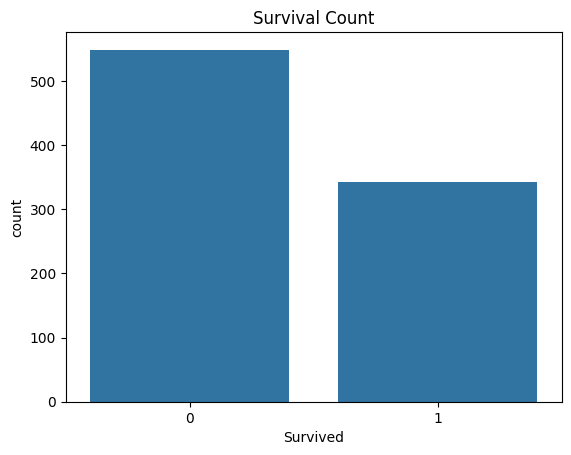

In [21]:
df['Survived'].value_counts()
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

Observation:  
Majority of passengers did not survive.

# Categorical Feature Analysis

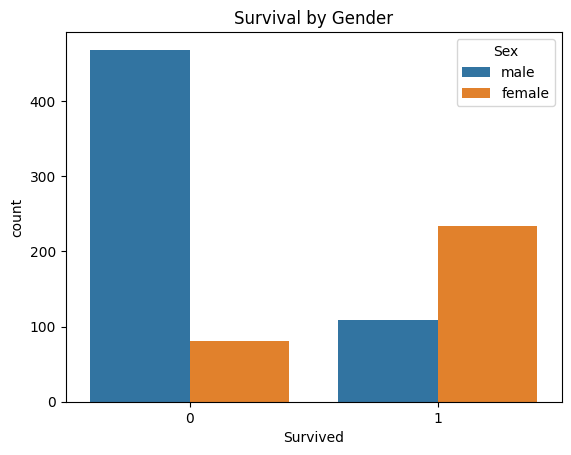

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

Observation:
Female passengers had significantly higher survival rates than males.

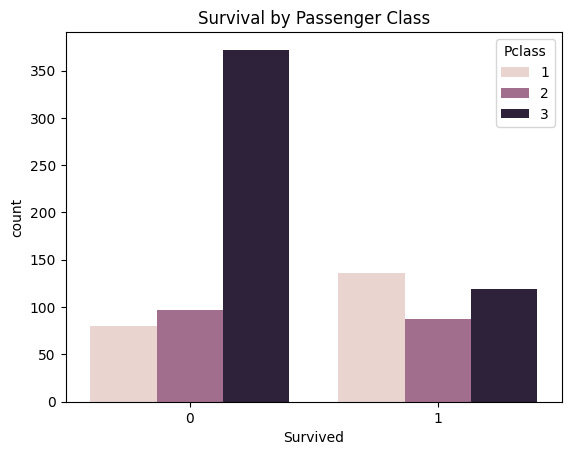

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

Observation:
First-class passengers showed the highest survival probability.

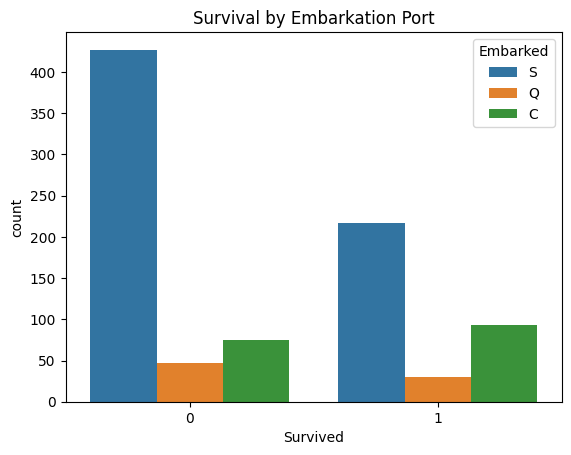

In [26]:
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title("Survival by Embarkation Port")
plt.show()

Observation:
Passengers embarking from Cherbourg (C) had better survival chances.

# Numerical Feature Analysis

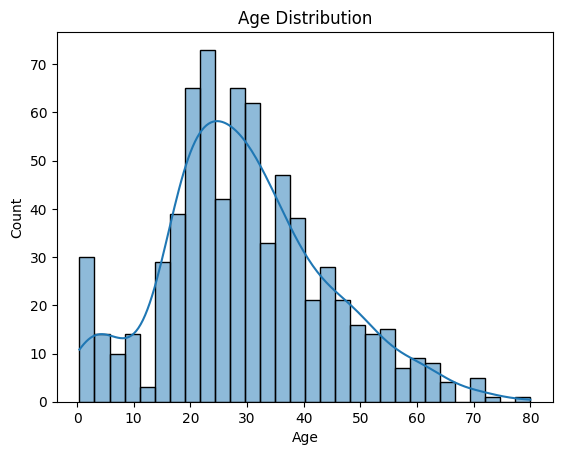

In [27]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Observation:
Most passengers were between 20 and 40 years of age.

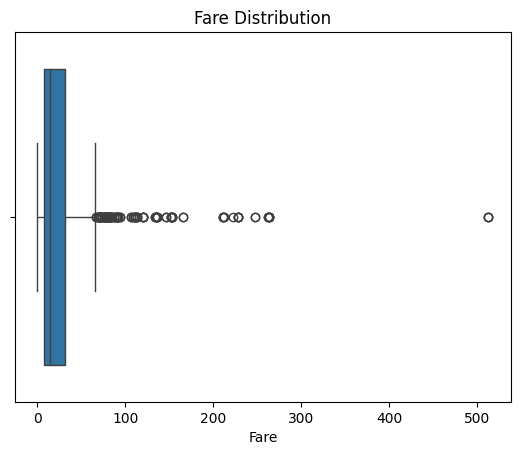

In [28]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution")
plt.show()

In [ ]:
Observation:
Fare distribution contains extreme outliers.

# Relationship Analysis

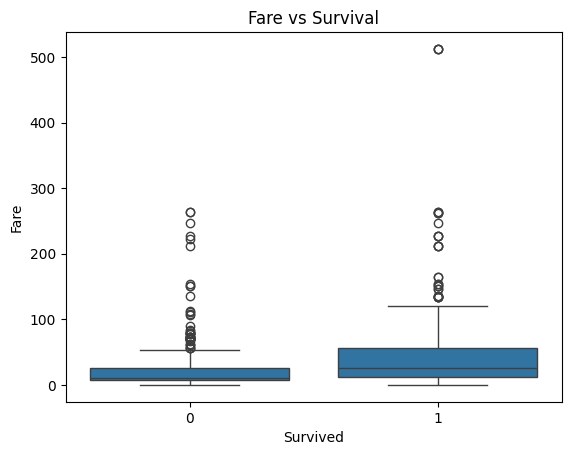

In [31]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

In [ ]:
Observation:
Survivors paid higher fares on average.

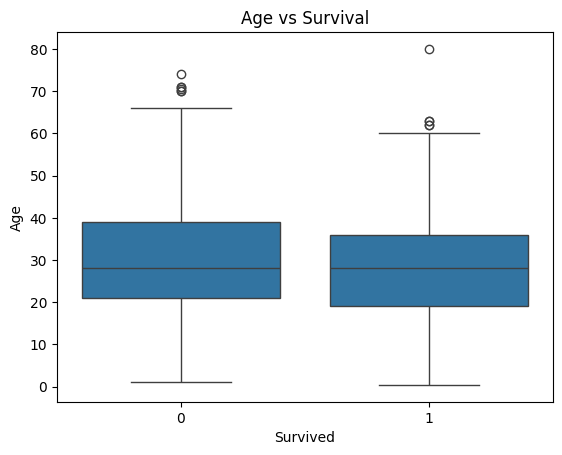

In [30]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

Observationn:
Younger passengers had slightly higher survival rates.

# Family Size effect 


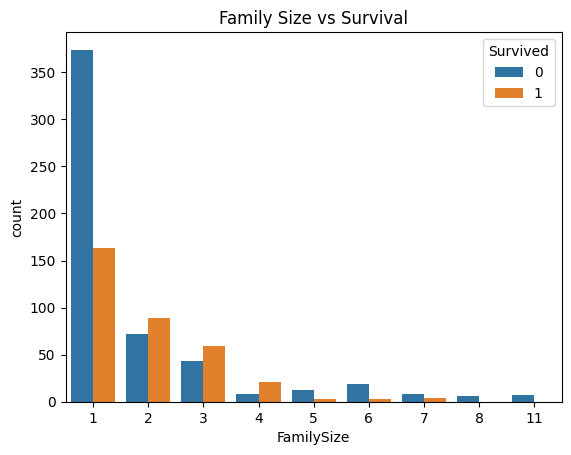

In [32]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Family Size vs Survival")
plt.show()

Observation:
Small families had better survival chances compared to solo or large families.

# Correlation Analysis


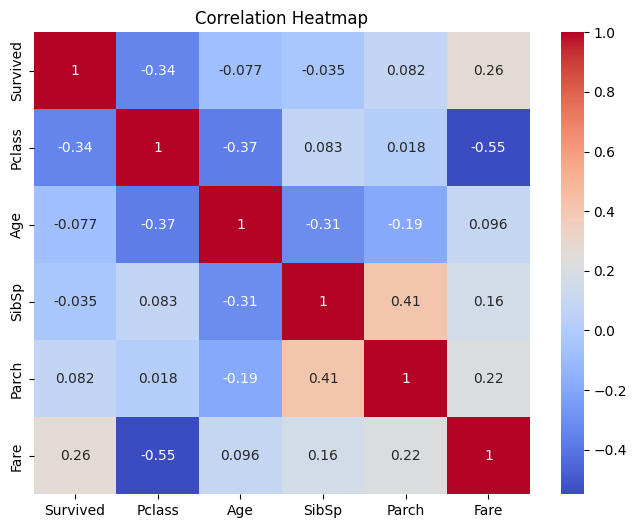

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),
annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Observation:
Survival is positively correlated with Fare and negatively correlated with Pclass.

# Column Relevance Summary

| Column      | Action          | Reason                  |
| ----------- | --------------- | ----------------------- |
| PassengerId | Ignore          | Identifier only         |
| Name        | Skip            | High cardinality        |
| Ticket      | Skip            | Not informative for EDA |
| Cabin       | Analyze missing | Many nulls              |
| Survived    | Core target     | Central to analysis     |


# Final Summary of Findings

1. Gender and passenger class significantly influenced survival
2. Higher fare passengers had better survival chances
3. Socio-economic factors played a major role in evacuation priority

# Conclusion

This EDA revealed meaningful patterns and relationships that explain survival trends in the Titanic disaster. The insights can be used for further predictive modeling or business-style analysis.